In [8]:
import numpy as np
import torch
import torch.optim as optim

In [4]:
# defining the two functions

def f1(x,y):
    return x**2 + (0.1 * y**2)

def f2(x, y):
    return (((x-y)**2) / 2) + (0.1 * (((x+y)**2) / 2))

In [35]:
def optimize_with_gd(func, x_init, y_init, lr=1e-3, steps=2000):
    x = torch.tensor(x_init, requires_grad=True)
    y = torch.tensor(y_init, requires_grad=True)
    optimizer = torch.optim.SGD([x, y], lr=lr)
    values = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = func(x, y)
        loss.backward()
        optimizer.step()
        values.append(loss.item())
    
    return values

In [36]:
def optimize_with_momentum(func, x_init, y_init, lr=1e-3, steps=2000, momentum=0.9):
    x = torch.tensor(x_init, requires_grad=True)
    y = torch.tensor(y_init, requires_grad=True)
    optimizer = torch.optim.SGD([x, y], lr=lr, momentum=momentum)
    values = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = func(x, y)
        loss.backward()
        optimizer.step()
        values.append(loss.item())
    
    return values

In [37]:
def optimize_with_rmsprop(func, x_init, y_init, lr=1e-3, steps=2000):
    x = torch.tensor(x_init, requires_grad=True)
    y = torch.tensor(y_init, requires_grad=True)
    optimizer = torch.optim.RMSprop([x, y], lr=lr)
    values = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = func(x, y)
        loss.backward()
        optimizer.step()
        values.append(loss.item())
    
    return values

In [38]:
def optimize_with_adam(func, x_init, y_init, lr=1e-3, steps=2000):
    x = torch.tensor(x_init, requires_grad=True)
    y = torch.tensor(y_init, requires_grad=True)
    optimizer = torch.optim.Adam([x, y], lr=lr)
    values = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = func(x, y)
        loss.backward()
        optimizer.step()
        values.append(loss.item())
    
    return values

In [39]:
import math

# Initial values
x_init_f1, y_init_f1 = 1.0, 1.0
x_init_f2, y_init_f2 = math.sqrt(2), 0.0

# Run optimization
results = {
    'f1_gd': optimize_with_gd(f1, x_init_f1, y_init_f1),
    'f1_momentum': optimize_with_momentum(f1, x_init_f1, y_init_f1),
    'f1_rmsprop': optimize_with_rmsprop(f1, x_init_f1, y_init_f1),
    'f1_adam': optimize_with_adam(f1, x_init_f1, y_init_f1),
    'f2_gd': optimize_with_gd(f2, x_init_f2, y_init_f2),
    'f2_momentum': optimize_with_momentum(f2, x_init_f2, y_init_f2),
    'f2_rmsprop': optimize_with_rmsprop(f2, x_init_f2, y_init_f2),
    'f2_adam': optimize_with_adam(f2, x_init_f2, y_init_f2),
}

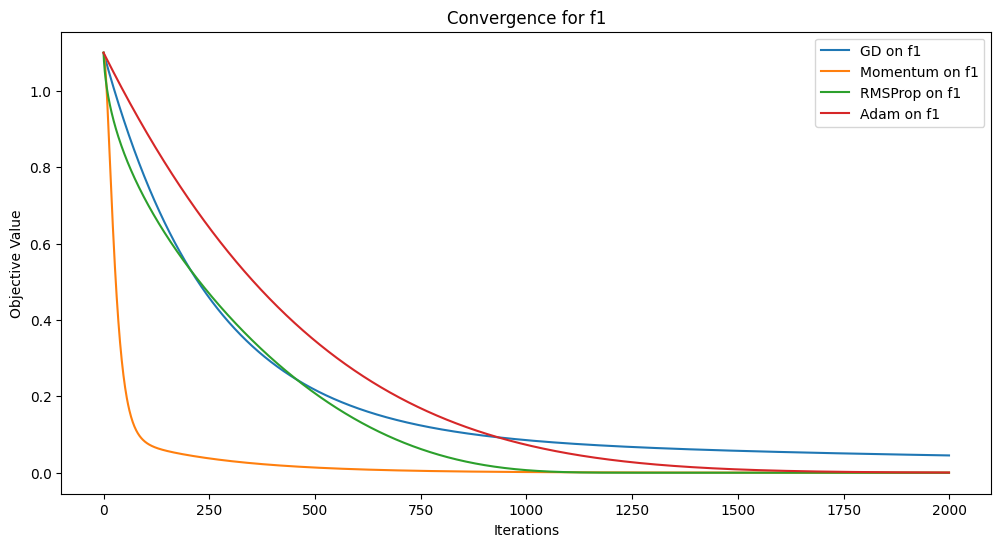

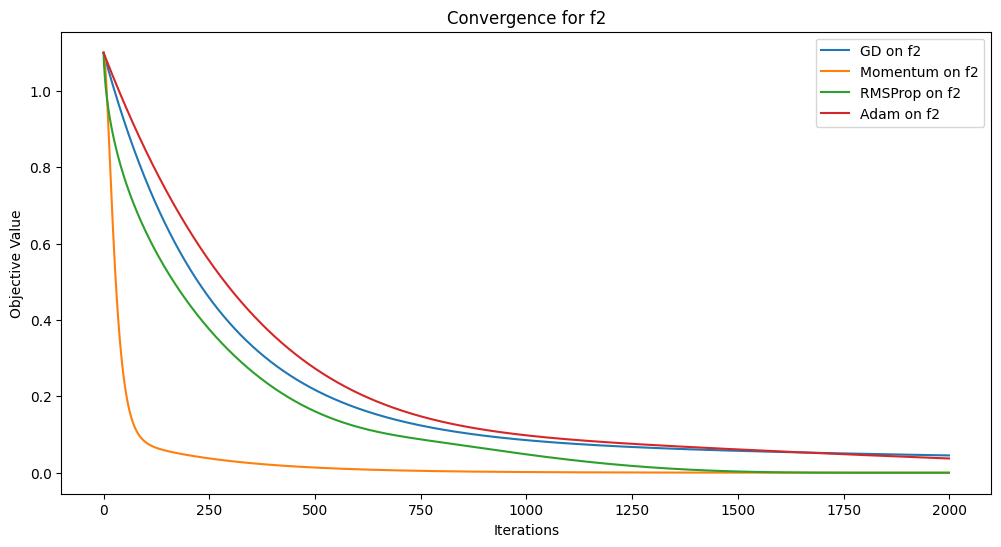

In [40]:


import matplotlib.pyplot as plt

# Plotting results for f1
plt.figure(figsize=(12, 6))
plt.plot(results['f1_gd'], label="GD on f1")
plt.plot(results['f1_momentum'], label="Momentum on f1")
plt.plot(results['f1_rmsprop'], label="RMSProp on f1")
plt.plot(results['f1_adam'], label="Adam on f1")
plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.title("Convergence for f1")
plt.legend()
plt.show()

# Plotting results for f2
plt.figure(figsize=(12, 6))
plt.plot(results['f2_gd'], label="GD on f2")
plt.plot(results['f2_momentum'], label="Momentum on f2")
plt.plot(results['f2_rmsprop'], label="RMSProp on f2")
plt.plot(results['f2_adam'], label="Adam on f2")
plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.title("Convergence for f2")
plt.legend()
plt.show()
